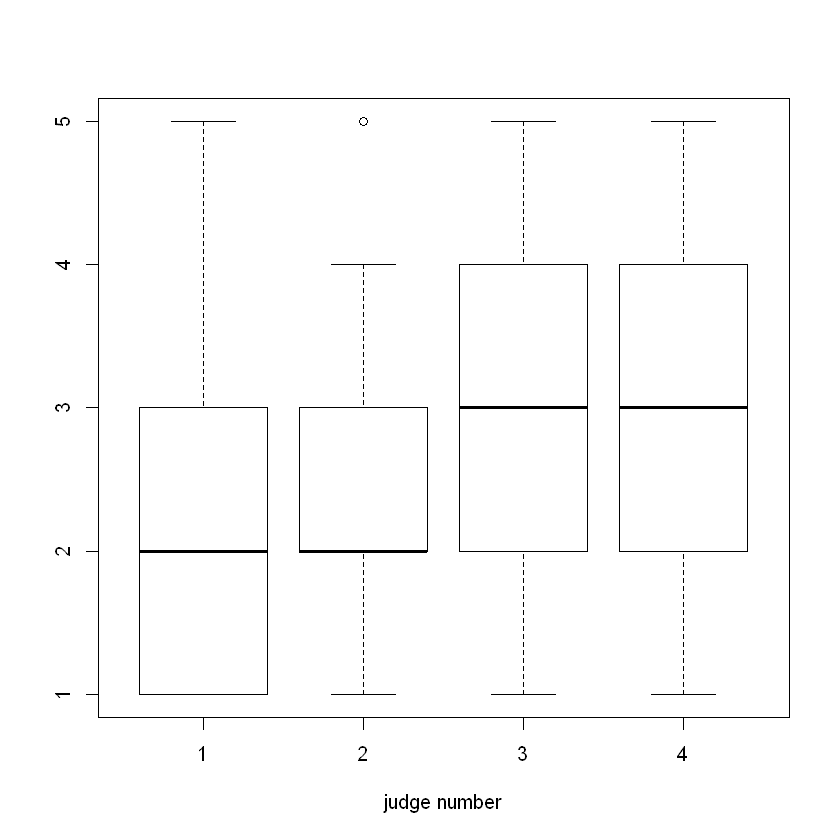

0,7.161858e-39,2.409588e-47,4.021082e-48
NA,0.000000e+00,3.560642e-44,4.073183e-38
NA,NA,0.000000e+00,9.226669e-54
NA,NA,NA,0.000000e+00


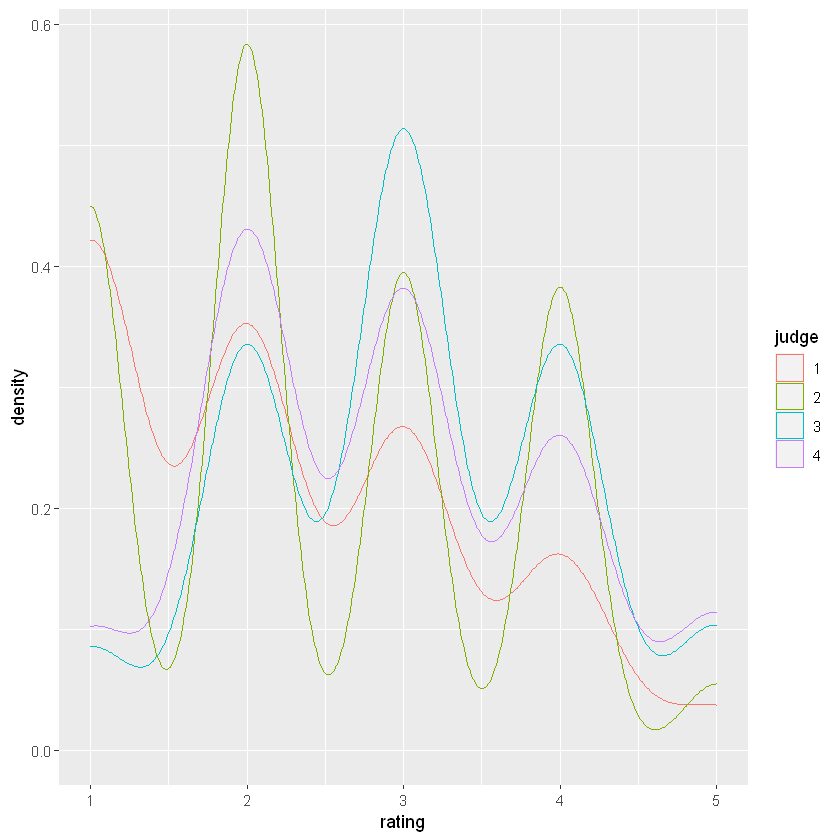

[1] 266 278 288 328 036 322 136 334 024 029 035 196 216 037 078 270
307 Levels: 002 003 004 006 007 008 009 010 011 012 013 015 016 017 018 ... 346

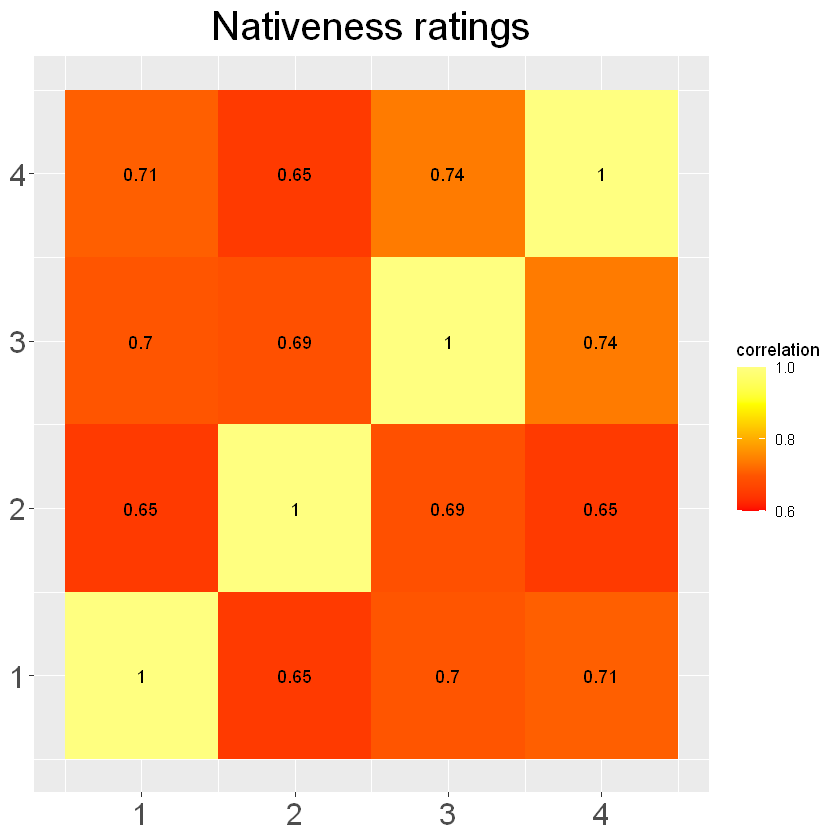

In [7]:
install.packages("tidyr")
install.packages("ggplot2")
install.packages("reshape2")
#install.packages("plot.matrix")
library("reshape2")
library("tidyr")
library("ggplot2")
#package corrr makes it possible to do pairwise correlation
# with several columns... but no statistical test: useless!
#library("corrr")
#load table
ratingTab = read.table('allNativenessRatings.txt', header = T)
ratingTab$judge = as.factor(ratingTab$judge)
#trim second column to keep speaker ID only
ratingTab$speaker = substr(ratingTab$speaker, 4, 6)
#rearrange table format
wideTab = spread(ratingTab, judge, rating)
#rating values
boxplot(wideTab[,2:5], xlab = "judge number")
#other visualization
ggplot(ratingTab, aes(x = rating)) + geom_density(aes(color = judge), n = 512)
#correlations
corrCoefs = cor(wideTab[,2:5])
#correlation significance (ok i'll do it with loop)
corrMat = matrix(nrow = 4,ncol = 4)
for (idx in 2:5){
  for (jdx in idx:5){
    corrMat[idx-1,jdx-1] = cor.test(wideTab[,idx], wideTab[,jdx])$p.value
  }
}
#correlations lower than I expected but still highly significant
corrMat

#prepare data to draw correlation matrix between nativeness ratings
rownames(corrCoefs) = unique(ratingTab$judge)
colnames(corrCoefs) = unique(ratingTab$judge)
#asCorResults = as.cor(corrCoefs)
asCorResults = corrCoefs
meltMat = melt(asCorResults)
colnames(meltMat) = c("judge1", "judge2", "correlation")
meltMat$correlation = round(meltMat$correlation, 2)


#plot correlation matrix
ggplot(data = meltMat, aes(x=judge1, y=judge2, 
                           fill=correlation)) + geom_tile() + geom_text(aes(label=correlation)) +
  scale_fill_gradientn(colours=heat.colors(5),na.value = "transparent",
                       breaks=c(0.6, 0.8, 1),
                       limits=c(0.6,1)) + ggtitle("Nativeness ratings") +
  theme(axis.text.x= element_text(size = 18), axis.text.y= element_text(size = 18),
        axis.title.x = element_blank(), axis.title.y = element_blank(),
        plot.title = element_text(size = 24,hjust=0.5))

#get speakers with highest variance in nativeness ratings
ratingVariance = apply(wideTab[,2:5], 1, var)
spkVariance = data.frame(wideTab$speaker, ratingVariance)
spkVariance = spkVariance[order(spkVariance$ratingVariance, decreasing = T),]

#speakers with variance > 1
spkVariance$wideTab.speaker[spkVariance$ratingVariance>1]



In [ ]:
tabLecteurs = read.table('lecteursNotesNoABI.txt', header = T)
meanJudgeRating = rowMeans(tabLecteurs[,2:5])
hist(tabLecteurs$notes_lecteurs)
mean(tabLecteurs$notes_lecteurs)
#sérieusement... la moyenne à 14,5 !!!
plot(meanJudgeRating, tabLecteurs$notes_lecteurs)
cor.test(meanJudgeRating, tabLecteurs$notes_lecteurs)
#petite correlation positive avec nos ratings
#on enlève les notes de 0
newRatings = meanJudgeRating[tabLecteurs$notes_lecteurs>0]
newGrades = tabLecteurs$notes_lecteurs[tabLecteurs$notes_lecteurs>0]

cor.test(newRatings, newGrades)
#ok les quelques zéros (6) impactaient pas mal la corrélation